<img src="./unal.png" align=left width="150" height="150"></img>

$\;$

---
<h2 align="center">Ecuaciones generalizadas de estimación (datos cerdos sacrificados)</h2>

Data contains weight of slaughter pigs measured weekly for 12 weeks. Data also contains the startweight (i.e. the weight at week 1). The treatments are 3 different levels of vitamin E (dose: 0, 100, 200 mg dl-alpha-tocopheryl acetat /kg feed) in combination with 3 different levels of Cu=copper (dose: 0, 35, 175 mg/kg feed) in the feed. 

In [2]:
rm(list=ls())
setwd("")
library(sqldf)
library(numDeriv)
library(Rfast)
source("macros.txt")
source("test.txt")

In [7]:
###################### Lectura de los datos ######################
data(dietox, package="geepack")
dietox$Cu <- as.factor(dietox$Cu)
str(dietox)
head(dietox)

'data.frame':	861 obs. of  8 variables:
 $ Pig   : Factor w/ 72 levels "4601","4602",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Evit  : Factor w/ 3 levels "Evit000","Evit100",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Cu    : Factor w/ 3 levels "Cu000","Cu035",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Litter: Factor w/ 21 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Start : num  26.5 26.5 26.5 26.5 26.5 26.5 26.5 26.5 26.5 26.5 ...
 $ Weight: num  26.5 27.6 36.5 40.3 49.1 ...
 $ Feed  : num  NA 5.2 17.6 28.5 45.2 ...
 $ Time  : int  1 2 3 4 5 6 7 8 9 10 ...


Pig,Evit,Cu,Litter,Start,Weight,Feed,Time
4601,Evit000,Cu000,1,26.5,26.50000,NA,1
4601,Evit000,Cu000,1,26.5,27.59999,5.200005,2
4601,Evit000,Cu000,1,26.5,36.50000,17.600000,3
4601,Evit000,Cu000,1,26.5,40.29999,28.500000,4
4601,Evit000,Cu000,1,26.5,49.09998,45.200001,5
4601,Evit000,Cu000,1,26.5,55.39999,56.900002,6


In [8]:
###################### Estimación del modelo ######################
fit201 <- geeglm(Weight ~ Cu*poly(Time,3), data=dietox, id=Pig, family=poisson("identity"), corstr="AR-1")
fit202 <- geeglm(Weight ~ Cu*poly(Time,3), data=dietox, id=Pig, family=poisson("identity"), corstr="Exchangeable")
fit203 <- geeglm(Weight ~ Cu*poly(Time,3), data=dietox, id=Pig, family=poisson("identity"), corstr="Stationary-M-dependent(2)")
fit204 <- geeglm(Weight ~ Cu*poly(Time,3), data=dietox, id=Pig, family=poisson("identity"), corstr="Non-Stationary-M-dependent(2)")

In [9]:
###################### Valores del QIC ######################
QIC(fit201,fit202,fit203,fit204)


Variance to mean relation:  poisson 
                     Link:  identity 
         Linear predictor:  1 + Cu + poly(Time, 3) + Cu:poly(Time, 3) 

 Object                   Correlation -2*quasi-likelihood  df     QIC  
 fit201                          AR-1           -423844.5  12 -423777.1
 fit202                  Exchangeable           -424572.7  12 -424505.0
 fit203     Stationary-M-dependent(2)           -422709.4  12 -422640.7
 fit204 Non-Stationary-M-dependent(2)           -422717.4  12 -422648.7


In [10]:
###################### Resumen del modelo seleccionado ######################
summary(fit202)


Sample size
       Number of clusters:  72
     Minimum cluster size:  11
     Maximum cluster size:  12
*************************************************************
Model
Variance to mean relation:  poisson
                     Link:  identity
    Correlation structure:  Exchangeable
*************************************************************
Coefficients
                        Estimate Std.Error   z-value   Pr(>|z|)
(Intercept)             60.41130   1.02612  58.87379 < 2.22e-16
CuCu035                 -0.84112   1.55978  -0.53926    0.58971
CuCu175                  1.77529   1.87472   0.94696    0.34366
poly(Time, 3)1         704.89515  12.18525  57.84821 < 2.22e-16
poly(Time, 3)2          34.55083   7.80446   4.42706 9.5526e-06
poly(Time, 3)3         -17.67932   2.93970  -6.01399 1.8102e-09
CuCu035:poly(Time, 3)1 -11.14901  17.27515  -0.64538    0.51868
CuCu175:poly(Time, 3)1   0.63366  20.63728   0.03070    0.97550
CuCu035:poly(Time, 3)2   3.00243  11.09465   0.27062    0.786

In [11]:
###################### Test de Wald ######################
fit205 <- geeglm(Weight ~ Cu + poly(Time,3), data=dietox, id=Pig, family=poisson("identity"), corstr="Exchangeable")
anova_glm(fit202,fit205,test="wald")


  Wald test 

 Model 1:  Weight ~ Cu * poly(Time, 3) 
 Model 2:  Weight ~ Cu + poly(Time, 3) 

   Chi    Df   Pr(>Chi)
  7.3539   6     0.2894


In [12]:
###################### Test de score ######################
anova_glm(fit202,fit205,test="score")


  Generalized score test 

 Model 1:  Weight ~ Cu * poly(Time, 3) 
 Model 2:  Weight ~ Cu + poly(Time, 3) 

   Chi    Df   Pr(>Chi)
  6.4003   6     0.3799


In [13]:
###################### Resumen del modelo seleccionado ######################
summary(fit205)


Sample size
       Number of clusters:  72
     Minimum cluster size:  11
     Maximum cluster size:  12
*************************************************************
Model
Variance to mean relation:  poisson
                     Link:  identity
    Correlation structure:  Exchangeable
*************************************************************
Coefficients
                Estimate Std.Error   z-value   Pr(>|z|)
(Intercept)     60.12576   1.27189  47.27282 < 2.22e-16
CuCu035          0.74897   1.56198   0.47950    0.63158
CuCu175          0.97935   1.73719   0.56376    0.57292
poly(Time, 3)1 701.23054   8.02972  87.32944 < 2.22e-16
poly(Time, 3)2  31.16701   4.08229   7.63468 2.2637e-14
poly(Time, 3)3 -18.05992   2.24300  -8.05167 8.1674e-16

Dispersion  0.80025 
*************************************************************
Goodness-of-fit statistics
      -2*quasi-likelihood:  -416409.5 
                      QIC:  -416348.5 
                     QICu:  -416397.5 
 Deviance-based R

In [14]:

###################### Test de Wald ######################
fit206 <- geeglm(Weight ~ poly(Time,3), data=dietox, id=Pig, family=poisson("identity"), corstr="Exchangeable")
anova_glm(fit206,fit205,test="wald")



  Wald test 

 Model 1:  Weight ~ Cu + poly(Time, 3) 
 Model 2:  Weight ~ poly(Time, 3) 

    Chi    Df   Pr(>Chi)
  0.36461   2     0.8333


In [15]:
###################### Test de score ######################
anova_glm(fit206,fit205,test="score")


  Generalized score test 

 Model 1:  Weight ~ Cu + poly(Time, 3) 
 Model 2:  Weight ~ poly(Time, 3) 

    Chi    Df   Pr(>Chi)
  0.35954   2     0.8355


In [16]:
###################### Resumen del modelo seleccionado ######################
summary(fit206)


Sample size
       Number of clusters:  72
     Minimum cluster size:  11
     Maximum cluster size:  12
*************************************************************
Model
Variance to mean relation:  poisson
                     Link:  identity
    Correlation structure:  Exchangeable
*************************************************************
Coefficients
                Estimate Std.Error   z-value   Pr(>|z|)
(Intercept)     60.71040   0.75131  80.80606 < 2.22e-16
poly(Time, 3)1 701.20402   8.02054  87.42603 < 2.22e-16
poly(Time, 3)2  31.12154   4.07612   7.63509 2.2566e-14
poly(Time, 3)3 -18.05711   2.25281  -8.01537 1.0981e-15

Dispersion  0.80387 
*************************************************************
Goodness-of-fit statistics
      -2*quasi-likelihood:  -414530.7 
                      QIC:  -414507.8 
                     QICu:  -414522.7 
 Deviance-based R-squared:  0.922 
*************************************************************
Working correlation
       [1]  

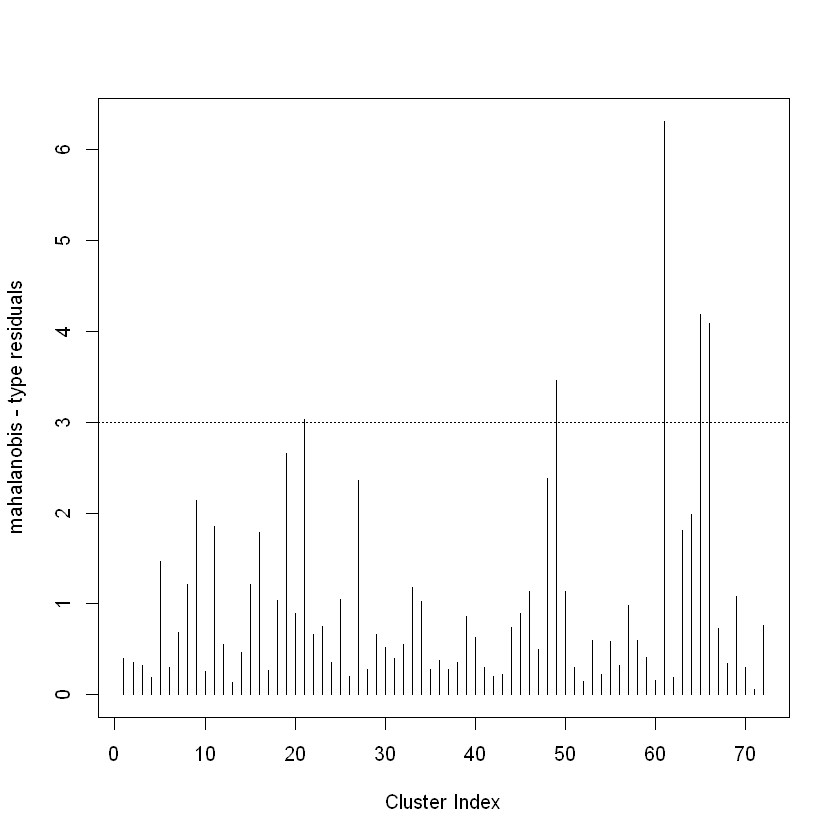

In [17]:
###################### Análisis de residuos ######################
residuals(fit206,out=FALSE,plot=TRUE,type="mahalanobis",identify=1)

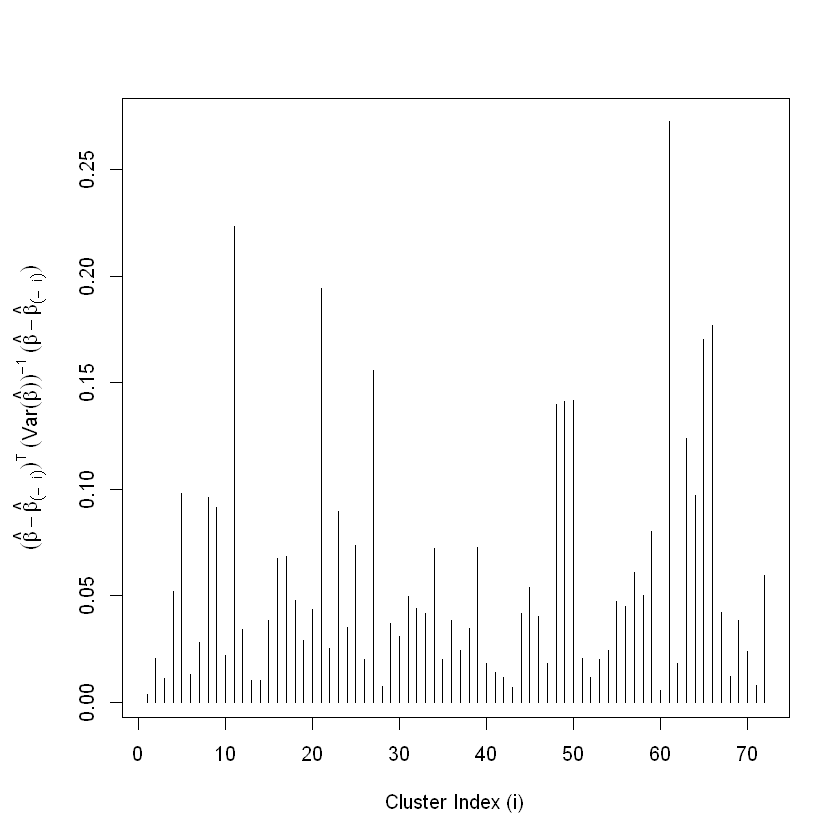

In [18]:
###################### Análisis de sensibilidad ######################
CookDistance(fit206,plot=TRUE,out=FALSE,identify=3)